In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [6]:
import pandas as pd

df = pd.read_excel('patent_counts.xlsx')
df

,申请日,类别,专利数量
0,1995,Polymers and its manufacturing process,1
1,2004,Coatings and adhesives,1
2,2005,Coatings and adhesives,1
3,2005,Fiber & Pulp,1
4,2005,Polymers and its manufacturing process,1
...,...,...,...
74,2022,"Microorganisms or enzymes, their compositions",3
75,2022,Polymers and its manufacturing process,2
76,2022,Fiber & Pulp,1
77,2022,Polymers and its manufacturing process,12


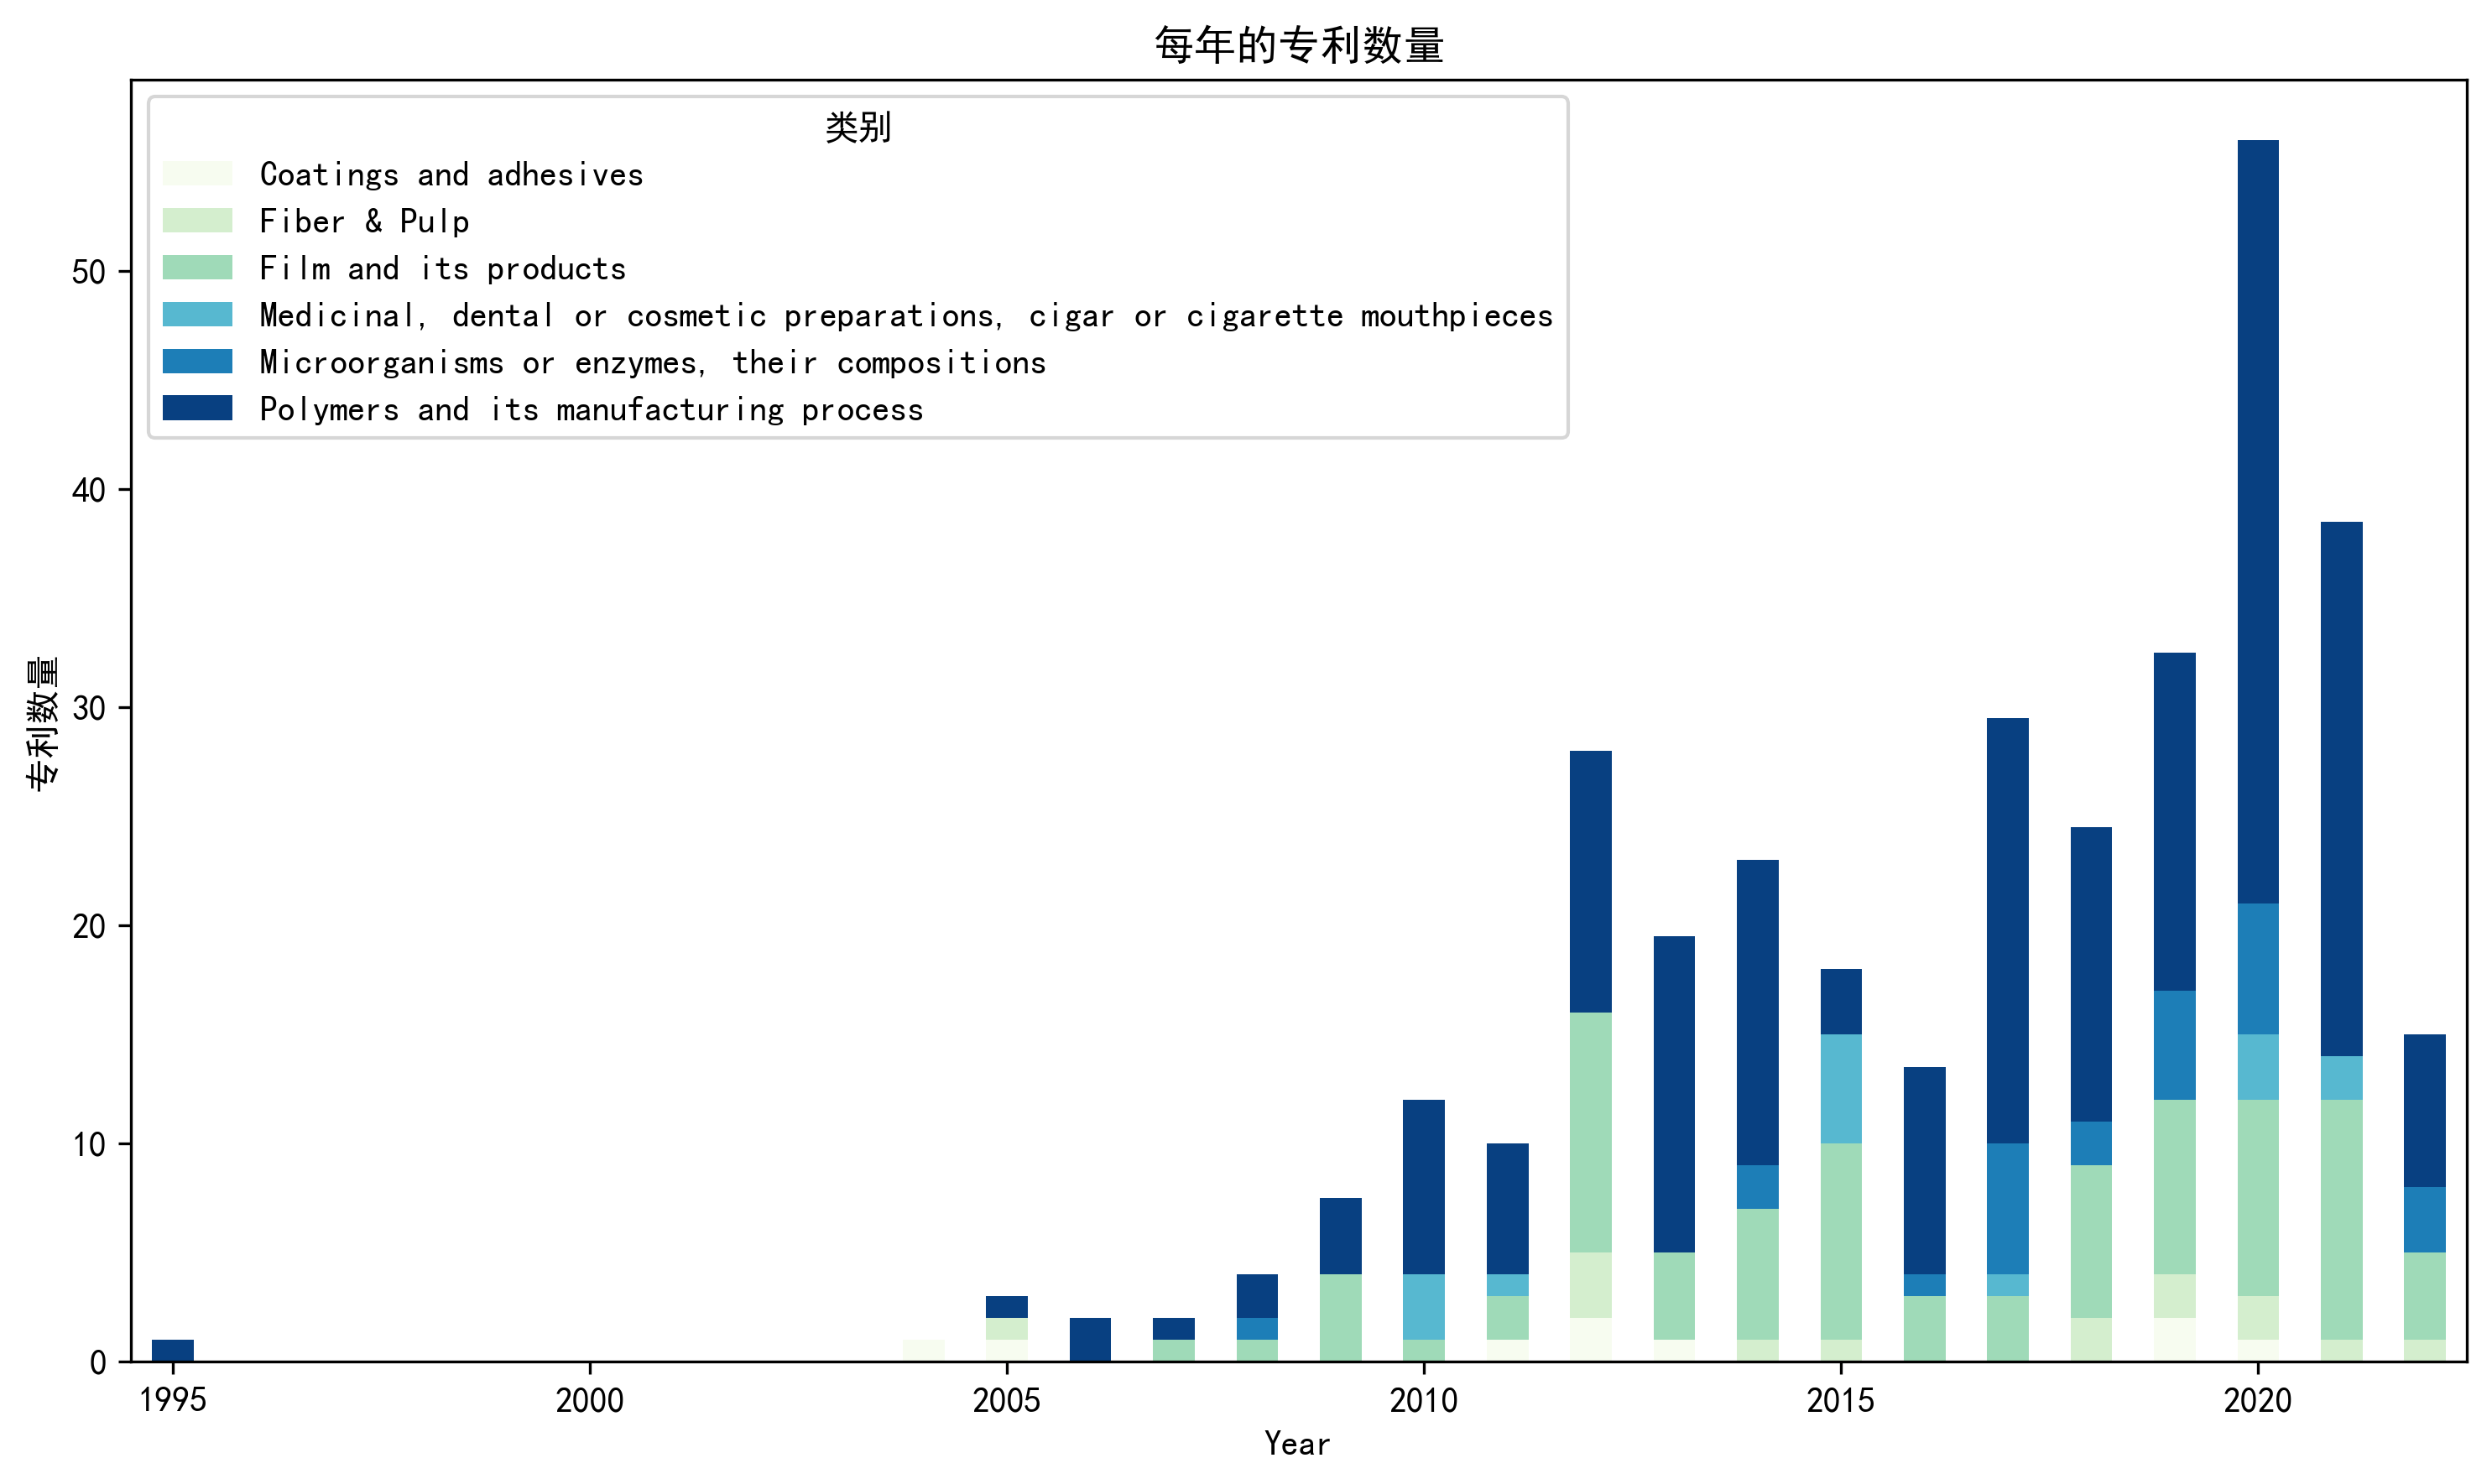

In [7]:
# 对专利数量进行透视
pivot_df = df.pivot_table(index='申请日', columns='类别', values='专利数量', fill_value=0)
# 重新索引确保所有年份都在数据中存在
years_range = range(df['申请日'].min(), df['申请日'].max() + 1)
pivot_df = pivot_df.reindex(years_range, fill_value=0)

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

# 创建柱状图实例
bar_chart = Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))

# 添加数据到图表
for category in pivot_df.columns:
    bar_chart.add_xaxis(list(pivot_df.index))
    bar_chart.add_yaxis(category, list(pivot_df[category]), stack="stack1")

# 设置图表属性
bar_chart.set_global_opts(
    xaxis_opts=opts.AxisOpts(type_="category", name="Year", axislabel_opts={"rotate": 0}),
        yaxis_opts=opts.AxisOpts(
        type_="value",
        name="Number of patents",
        axisline_opts=opts.AxisLineOpts(is_show=True),  # 显示刻度线
    ),
    legend_opts=opts.LegendOpts(
        pos_right="auto",  # 不固定在右侧
            pos_left="12%",  # 图例左侧距离图表左侧5%
            pos_top="15%",  # 图例顶部距离图表顶部5%
            orient="vertical",  # 垂直排列图例项
            item_gap=10,  # 图例项之间的间隔
            border_width=0 
    ),
    datazoom_opts=[opts.DataZoomOpts(range_start=0, range_end=100, is_zoom_lock=False)],
    graphic_opts=[
        opts.GraphicGroup(
            graphic_item=opts.GraphicItem(
                bounding="raw",
                right=210,
                bottom=80,
                z=200,
            )
        )
    ],
)

# 设置系列选项，隐藏数值标签
bar_chart.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

bar_chart.render("patent_analysis.html")
# 在Jupyter中显示图表
bar_chart.render_notebook()

In [7]:
import matplotlib.cm as cm

# 获取 Viridis 调色板的 RGB 值
viridis_colors = cm.get_cmap('YlGnBu', 7)

# 将 RGB 值转换为十六进制格式
[f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}" for r, g, b, _ in viridis_colors(range(7))]

C:\Users\RIC_ZX\AppData\Local\Temp\ipykernel_6872\3727446464.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_colors = cm.get_cmap('YlGnBu', 7)


['#ffffd9', '#e0f3b2', '#97d6b8', '#41b6c4', '#1e80b8', '#24429a', '#081d58']